In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#Import requests 
import requests 

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    altair-4.1.0               |             py_1         614 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         713 KB

The following NEW packages will be INSTALLED:

  altair             conda-forge/noarch::altair-4.1.0-py_1
  branca             conda-forge/noarch::branca-0.4.1-py_0
  folium             conda-forge/n

In [2]:
url = '../input/usafoodie/ffr.csv'

In [3]:
df_us= pd.read_csv (url)
print("The Required Data Has Been Imported!")

The Required Data Has Been Imported!


Now that the data has been imported, let us get the idea of the data-set and initiate dwranggling and cleaning process.

In [4]:
df_us.shape

(10000, 15)

Let us see the columns

In [5]:
df_us.columns

Index(['id', 'dateAdded', 'dateUpdated', 'address', 'categories', 'city',
       'country', 'keys', 'latitude', 'longitude', 'name', 'postalCode',
       'province', 'sourceURLs', 'websites'],
      dtype='object')

In [6]:
df_us.head(2)

,id,dateAdded,dateUpdated,address,categories,city,country,keys,latitude,longitude,name,postalCode,province,sourceURLs,websites
0,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...
1,AVwcmSyZIN2L1WUfmxyw,2015-10-19T23:47:58Z,2018-06-26T03:00:14Z,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,US,us/la/thibodaux/800ncanalblvd/1780593795,29.814697,-90.814742,SONIC Drive In,70301,LA,https://foursquare.com/v/sonic-drive-in/4b7361...,https://locations.sonicdrivein.com/la/thibodau...


Now let us drop the columns that we dont require.

In [7]:
df_us.drop(columns={'id','dateAdded','dateUpdated','keys','postalCode','country','sourceURLs', 'websites' }, inplace = True)
df_us.head(5)

,address,categories,city,latitude,longitude,name,province
0,800 N Canal Blvd,American Restaurant and Fast Food Restaurant,Thibodaux,29.814697,-90.814742,SONIC Drive In,LA
1,800 N Canal Blvd,Fast Food Restaurants,Thibodaux,29.814697,-90.814742,SONIC Drive In,LA
2,206 Wears Valley Rd,Fast Food Restaurant,Pigeon Forge,35.803788,-83.580553,Taco Bell,TN
3,3652 Parkway,Fast Food,Pigeon Forge,35.782339,-83.551408,Arby's,TN
4,2118 Mt Zion Parkway,Fast Food Restaurant,Morrow,33.562738,-84.321143,Steak 'n Shake,GA


Now let us rearrange the columns in a more conveninet manner

In [8]:
df_us = df_us[['name','categories','city','province','address','latitude','longitude']]

In [9]:

print("The Columns are in the format we Required!")
df_us.head()

The Columns are in the format we Required!


,name,categories,city,province,address,latitude,longitude
0,SONIC Drive In,American Restaurant and Fast Food Restaurant,Thibodaux,LA,800 N Canal Blvd,29.814697,-90.814742
1,SONIC Drive In,Fast Food Restaurants,Thibodaux,LA,800 N Canal Blvd,29.814697,-90.814742
2,Taco Bell,Fast Food Restaurant,Pigeon Forge,TN,206 Wears Valley Rd,35.803788,-83.580553
3,Arby's,Fast Food,Pigeon Forge,TN,3652 Parkway,35.782339,-83.551408
4,Steak 'n Shake,Fast Food Restaurant,Morrow,GA,2118 Mt Zion Parkway,33.562738,-84.321143


Lets us check if there are any NaN values or vague entries which must be addressed

In [10]:
null = df_us.isnull().sum()

print("The Detail of Null Values is as Follows", null)

The Detail of Null Values is as Follows name          0
categories    0
city          0
province      0
address       0
latitude      0
longitude     0
dtype: int64


In [11]:
df_us.dtypes

name           object
categories     object
city           object
province       object
address        object
latitude      float64
longitude     float64
dtype: object

In [12]:
df_us["province"].unique()

array(['LA', 'TN', 'GA', 'MI', 'CA', 'NY', 'TX', 'OH', 'SC', 'MS', 'IN',
       'MA', 'FL', 'MO', 'PA', 'IL', 'CT', 'KY', 'KS', 'IA', 'HI', 'ID',
       'NC', 'DE', 'AZ', 'WI', 'CO', 'AR', 'SD', 'WV', 'WY', 'VA', 'OR',
       'MD', 'WA', 'UT', 'NV', 'OK', 'ME', 'ND', 'NH', 'VT', 'NJ', 'NE',
       'MN', 'MT', 'AL', 'NM', 'AK', 'RI'], dtype=object)

Now we need to get the data of only Texas i.e. Texas (TX) as our traget province is Texas

In [13]:
texas_data=df_us[df_us['province'].str.contains("TX")]
texas_data.head()

,name,categories,city,province,address,latitude,longitude
9,Dairy Queen,Fast Food Restaurant,Monahans,TX,1407 S Stockton Ave,31.580721,-102.891455
10,Dairy Queen,Fast Food Restaurant and Ice Cream Shop,Mabank,TX,208 W Mason St,32.366020,-96.103364
11,Dairy Queen,Ice Cream Shop and Fast Food Restaurant,Missouri City,TX,5801 Highway 6,29.570079,-95.568166
13,Golden Chick,Fast Food Restaurants,Eastland,TX,1500 E Main St,32.401088,-98.790162
53,Taco Bell,Fast Food Restaurant and Mexican Restaurant,Wylie,TX,1601 W Kirby St,33.007329,-96.554127


Let us check the shape of the data-set now. The number of rows must have reduced now

In [14]:
texas_data=texas_data[texas_data['city'].str.contains("Houston")]
texas_data.head()

,name,categories,city,province,address,latitude,longitude
1239,Panda Express,Fast Food,Houston,TX,9319 Highway 6 S,29.677586,-95.642733
1571,Chick-fil-A,Fast Food Restaurant,Houston,TX,4410 North Fwy,29.829027,-95.380472
1869,Boston Market,American Restaurant and Fast Food Restaurant,Houston,TX,7616 Westheimer Rd,29.737651,-95.504136
1870,Boston Market,Fast Food Restaurant,Houston,TX,4672 Beechnut St,29.689257,-95.458159
1871,Boston Market,Fast Food Restaurant,Houston,TX,9460 Jones Rd,29.909558,-95.584175


In [15]:
texas_data.index

Int64Index([1239, 1571, 1869, 1870, 1871, 1872, 1889, 1920, 1922, 1923,
            ...
            7664, 8316, 8318, 8319, 8320, 8626, 8726, 8727, 8897, 9582],
           dtype='int64', length=106)

In [16]:
print ("The new Shape of this DataFrame is",df_us.shape)

The new Shape of this DataFrame is (10000, 7)


Now let us Engage the Foursquare API

In [17]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

Solving environment: done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geographiclib-1.50   | 34 KB     | ##################################### | 100% 
geopy-2.0.0          | 63 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [18]:
df_us.head()

,name,categories,city,province,address,latitude,longitude
0,SONIC Drive In,American Restaurant and Fast Food Restaurant,Thibodaux,LA,800 N Canal Blvd,29.814697,-90.814742
1,SONIC Drive In,Fast Food Restaurants,Thibodaux,LA,800 N Canal Blvd,29.814697,-90.814742
2,Taco Bell,Fast Food Restaurant,Pigeon Forge,TN,206 Wears Valley Rd,35.803788,-83.580553
3,Arby's,Fast Food,Pigeon Forge,TN,3652 Parkway,35.782339,-83.551408
4,Steak 'n Shake,Fast Food Restaurant,Morrow,GA,2118 Mt Zion Parkway,33.562738,-84.321143


In [19]:
texas_data["city"].unique()

array(['Houston'], dtype=object)

In [20]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [21]:
import folium

Now let us define the function to get teh geocodes that is latitude and longitude

In [22]:
address = 'Houston, TX'

geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

29.7589382 -95.3676974


lets define our Foursquare credentials and version into python code

In [23]:
CLIENT_ID = 'D3EK4KEVLAEJSB2JWMREP4YGPSOHKCFOSNAYEDQ2YRDHWR5N' # your Foursquare ID
CLIENT_SECRET = 'DSTB2VGB1K4ANOH2EXVVN2JDK5ZARJP11LUOVZMKLK0YGQKZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print("Credentials Defined!")

Your credentails:
CLIENT_ID: D3EK4KEVLAEJSB2JWMREP4YGPSOHKCFOSNAYEDQ2YRDHWR5N
CLIENT_SECRET:DSTB2VGB1K4ANOH2EXVVN2JDK5ZARJP11LUOVZMKLK0YGQKZ
Credentials Defined!


Let us try and get the details of the fast food restaurants available in the 1000 meters radius from the given latitude and longitude

In [24]:
search_query = 'Fast Food Restaurants'
radius = 1000
LIMIT = 200
print(search_query + ' .... OK!')

Fast Food Restaurants .... OK!


Now defining the corresponding URL

In [25]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=D3EK4KEVLAEJSB2JWMREP4YGPSOHKCFOSNAYEDQ2YRDHWR5N&client_secret=DSTB2VGB1K4ANOH2EXVVN2JDK5ZARJP11LUOVZMKLK0YGQKZ&ll=29.7589382,-95.3676974&v=20180605&query=Fast Food Restaurants&radius=1000&limit=200'

In [26]:
import requests

Sending the GET Request to Examine the results

In [27]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f1c1e46979acd6d919102db'},
 'response': {'venues': [{'id': '5cb69b77fb8e59002cb39b50',
    'name': 'Flavors Indian Fast Food',
    'location': {'address': '808 Travis St',
     'lat': 29.758804321289062,
     'lng': -95.3653335571289,
     'labeledLatLngs': [{'label': 'display',
       'lat': 29.758804321289062,
       'lng': -95.3653335571289}],
     'distance': 228,
     'postalCode': '77002',
     'cc': 'US',
     'city': 'Houston',
     'state': 'TX',
     'country': 'United States',
     'formattedAddress': ['808 Travis St',
      'Houston, TX 77002',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d16e941735',
      'name': 'Fast Food Restaurant',
      'pluralName': 'Fast Food Restaurants',
      'shortName': 'Fast Food',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/fastfood_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1595678280',
    'hasPerk': False}]}}

Enaging relevant part of our CSV file specific for Hosuton 

In [28]:
venues = results['response']['venues']

dataframe = texas_data
dataframe.head()

,name,categories,city,province,address,latitude,longitude
1239,Panda Express,Fast Food,Houston,TX,9319 Highway 6 S,29.677586,-95.642733
1571,Chick-fil-A,Fast Food Restaurant,Houston,TX,4410 North Fwy,29.829027,-95.380472
1869,Boston Market,American Restaurant and Fast Food Restaurant,Houston,TX,7616 Westheimer Rd,29.737651,-95.504136
1870,Boston Market,Fast Food Restaurant,Houston,TX,4672 Beechnut St,29.689257,-95.458159
1871,Boston Market,Fast Food Restaurant,Houston,TX,9460 Jones Rd,29.909558,-95.584175


In [29]:
dataframe["categories"].unique()

array(['Fast Food', 'Fast Food Restaurant',
       'American Restaurant and Fast Food Restaurant',
       'Fast Food Restaurants',
       'Fast Food Restaurant and Burger Joint Greater Third Ward',
       'Fast Food Restaurant North Houston',
       'Fast Food Restaurant and Burger Joint',
       'Fast Food Restaurant OST - South Union', 'fast food restaurant'],
      dtype=object)

In [30]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

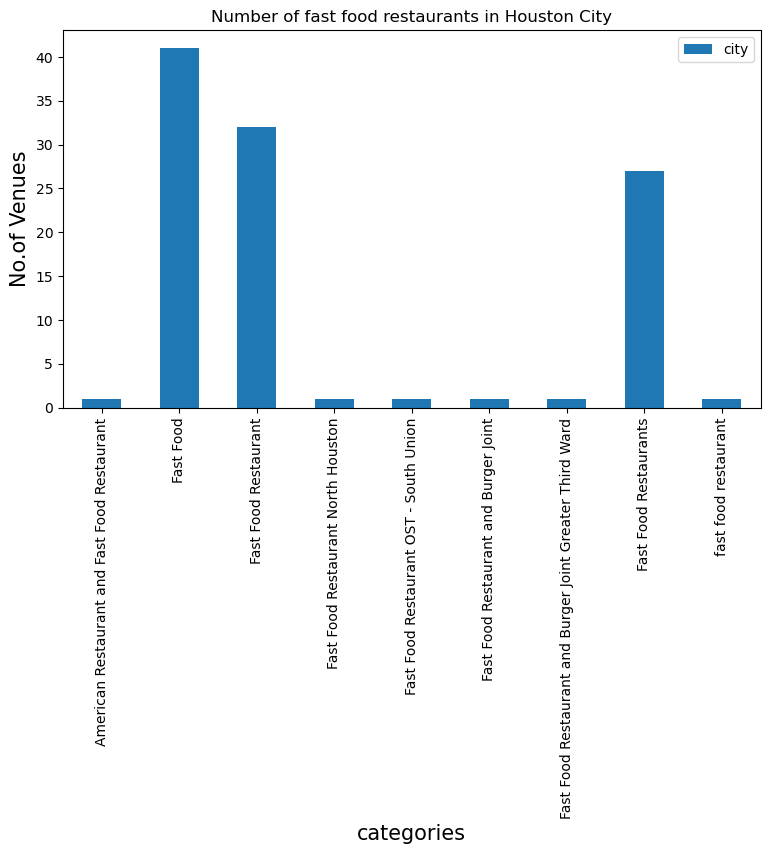

In [31]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of fast food restaurants in Houston City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Venues', fontsize=15)
#giving a bar plot
dataframe.groupby('categories')['city'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

We can Clearly see that the total number of Fast Food Restaurants & Fast Food Restaurant is 59 

Let us get a folium map of all the restaurants in our dataframe

In [32]:
venues_map = folium.Map(location=[latitude, longitude], zoom_start=10) # generate map centred around the Conrad Hotel

# add a red circle marker to represent the DownTown Hosuton Area
folium.features.CircleMarker(
    [latitude, longitude],
    radius=300,
    color='red',
    popup='Texas Down Town',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.3
).add_to(venues_map)

# add the fast food restaurants as blue circle markers
for lat, lng, label in zip(dataframe.latitude, dataframe.longitude, dataframe.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# display map
venues_map

Let collect the Fast Food Restaurants in Neighbourhood

In [53]:
texas_data.head()

,name,categories,city,province,address,latitude,longitude
1239,Panda Express,Fast Food,Houston,TX,9319 Highway 6 S,29.677586,-95.642733
1571,Chick-fil-A,Fast Food Restaurant,Houston,TX,4410 North Fwy,29.829027,-95.380472
1869,Boston Market,American Restaurant and Fast Food Restaurant,Houston,TX,7616 Westheimer Rd,29.737651,-95.504136
1870,Boston Market,Fast Food Restaurant,Houston,TX,4672 Beechnut St,29.689257,-95.458159
1871,Boston Market,Fast Food Restaurant,Houston,TX,9460 Jones Rd,29.909558,-95.584175


> Let us use Foursquare API call to check which venues are available and create a new dataframe w.r.t Venues in Houston

In [54]:
def getNearbyVenues(names, latitudes, longitudes):
    search_query = 'Fast Food Restaurants'
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Venue', 
                  'City Latitude', 
                  'City Longitude', 
                  'City', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [55]:
texas_venues = getNearbyVenues(names=texas_data['name'],
                                   latitudes=texas_data['latitude'],
                                   longitudes=texas_data['longitude']
                                  )

Panda Express
Chick-fil-A
Boston Market
Boston Market
Boston Market
Einstein Bros Bagels
Pei Wei
Subway
Subway
Subway
Subway
Chick-fil-A
Panera Bread
Pizza Inn
Domino's Pizza
Domino's Pizza
Burger King
Burger King
Burger King
Burger King
Burger King
Bubba's Texas Burger Shack
Jamba Juice
Jamba Juice
Domino's Pizza
Domino's Pizza
Wendy's
Wendy's
Wendy's
Wingstop
Luby's
Burger King
Burger King
Burger King
Burger King
McDonald's
McDonald's
McDonald's
McDonald's
McDonald's
McDonald's
McDonald's
McDonald's
McDonald's
Panda Express
Subway
Papa John's Pizza
McDonald's
McDonald's
McDonald's
McDonald's
McDonald's
McDonald's
KFC
McDonald's
Subway
Jack in the Box
Popeyes Louisiana Kitchen
Panda Express
Wendy's
Wendy's
Wendy's
McDonald's
Jack in the Box
Jack in the Box
Jack in the Box
Jack in the Box
Jack in the Box
Jack in the Box
Jack in the Box
Jack in the Box
Jack in the Box
Jack in the Box
Jack in the Box
Jack in the Box
Jack in the Box
Jack in the Box
Jack in the Box
Jack in the Box
Jack in 

In [100]:
texas_venues.head()

,Venue,City Latitude,City Longitude,City,Venue Latitude,Venue Longitude,Venue Category
0,Panda Express,29.677586,-95.642733,Starbucks,29.678040,-95.642846,Coffee Shop
1,Panda Express,29.677586,-95.642733,"Spec's Wines, Spirits & Finer Foods",29.676251,-95.644364,Liquor Store
2,Panda Express,29.677586,-95.642733,Gyro King,29.678952,-95.641438,Middle Eastern Restaurant
3,Panda Express,29.677586,-95.642733,Dollar Tree,29.675618,-95.644199,Discount Store
4,Panda Express,29.677586,-95.642733,Mike's seafood,29.679561,-95.644109,Seafood Restaurant


Let us make a new dataframe with only fast food restaurants

In [101]:
fast_food=texas_venues[texas_venues['Venue Category'].str.contains("Fast Food Restaurant")]
fast_food.head()

,Venue,City Latitude,City Longitude,City,Venue Latitude,Venue Longitude,Venue Category
20,Panda Express,29.677586,-95.642733,McDonald's,29.678116,-95.644304,Fast Food Restaurant
22,Panda Express,29.677586,-95.642733,Wendy’s,29.679654,-95.642957,Fast Food Restaurant
24,Chick-fil-A,29.829027,-95.380472,Chick-fil-A,29.828936,-95.380430,Fast Food Restaurant
48,Chick-fil-A,29.829027,-95.380472,Wendy’s,29.828212,-95.381588,Fast Food Restaurant
54,Chick-fil-A,29.829027,-95.380472,Taco Bell,29.828306,-95.379528,Fast Food Restaurant


In [102]:
fast_food = fast_food.rename(columns={'Venue Latitude':'Latitude','Venue Longitude':'Longitude', 'Venue Category': 'Category'})

We have the venues specific for fast food restaurants only. 

In [103]:
fast_food.head()

,Venue,City Latitude,City Longitude,City,Latitude,Longitude,Category
20,Panda Express,29.677586,-95.642733,McDonald's,29.678116,-95.644304,Fast Food Restaurant
22,Panda Express,29.677586,-95.642733,Wendy’s,29.679654,-95.642957,Fast Food Restaurant
24,Chick-fil-A,29.829027,-95.380472,Chick-fil-A,29.828936,-95.380430,Fast Food Restaurant
48,Chick-fil-A,29.829027,-95.380472,Wendy’s,29.828212,-95.381588,Fast Food Restaurant
54,Chick-fil-A,29.829027,-95.380472,Taco Bell,29.828306,-95.379528,Fast Food Restaurant


In [104]:
fast_food.index = pd.RangeIndex(start=0, stop=187, step=1)

In [105]:
fast_food.head()

,Venue,City Latitude,City Longitude,City,Latitude,Longitude,Category
0,Panda Express,29.677586,-95.642733,McDonald's,29.678116,-95.644304,Fast Food Restaurant
1,Panda Express,29.677586,-95.642733,Wendy’s,29.679654,-95.642957,Fast Food Restaurant
2,Chick-fil-A,29.829027,-95.380472,Chick-fil-A,29.828936,-95.380430,Fast Food Restaurant
3,Chick-fil-A,29.829027,-95.380472,Wendy’s,29.828212,-95.381588,Fast Food Restaurant
4,Chick-fil-A,29.829027,-95.380472,Taco Bell,29.828306,-95.379528,Fast Food Restaurant


Lets us drop the irrelevant columns 

In [106]:
fast_food.drop(columns={'City Latitude','City Longitude','City'})

,Venue,Latitude,Longitude,Category
0,Panda Express,29.678116,-95.644304,Fast Food Restaurant
1,Panda Express,29.679654,-95.642957,Fast Food Restaurant
2,Chick-fil-A,29.828936,-95.380430,Fast Food Restaurant
3,Chick-fil-A,29.828212,-95.381588,Fast Food Restaurant
4,Chick-fil-A,29.828306,-95.379528,Fast Food Restaurant
5,Chick-fil-A,29.828021,-95.375655,Fast Food Restaurant
6,Chick-fil-A,29.828631,-95.377114,Fast Food Restaurant
7,Chick-fil-A,29.830309,-95.377354,Fast Food Restaurant
8,Boston Market,29.688868,-95.458123,Fast Food Restaurant
9,Boston Market,29.908950,-95.585175,Fast Food Restaurant


Now that we have made the new data frame, let us put the restaurants on the folium map

In [120]:
venues_map_hs = folium.Map(location=[latitude, longitude], zoom_start=10)

# add a red circle marker to represent the DownTown Hosuton Area
folium.features.CircleMarker(
    [latitude, longitude],
    radius=100,
    color='red',
    popup='Texas Down Town',
    fill = True,
    fill_color = 'green',
    fill_opacity = 0.3
).add_to(venues_map_hs)

# add the fast food restaurants as blue circle markers
for lat, lng, label in zip(fast_food.Latitude, fast_food.Longitude, fast_food.Category):
    folium.features.CircleMarker(
        [lat, lng],
        radius=4,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map_hs)
# display map
venues_map_hs


AttributeError: module 'folium' has no attribute 'Feature'

Through this folium map, we can now access that which areas in Houston have more Fast Food Restaurant and Where the potential for a new chain is available